In [1]:
import pandas as pd
boston = pd.read_csv("boston.csv")
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
boston.info()
# Checking if any column is object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [3]:
#split data bw IVs and DV
x = boston.drop("MEDV", axis=1).values # all independent variables

y = boston["MEDV"].values # dependent

In [4]:
type(x)
# changed to array for comfortability

numpy.ndarray

Assumptions of Linear Regressions:
Assumes a linear (straight line) relationship bw IVs and DV

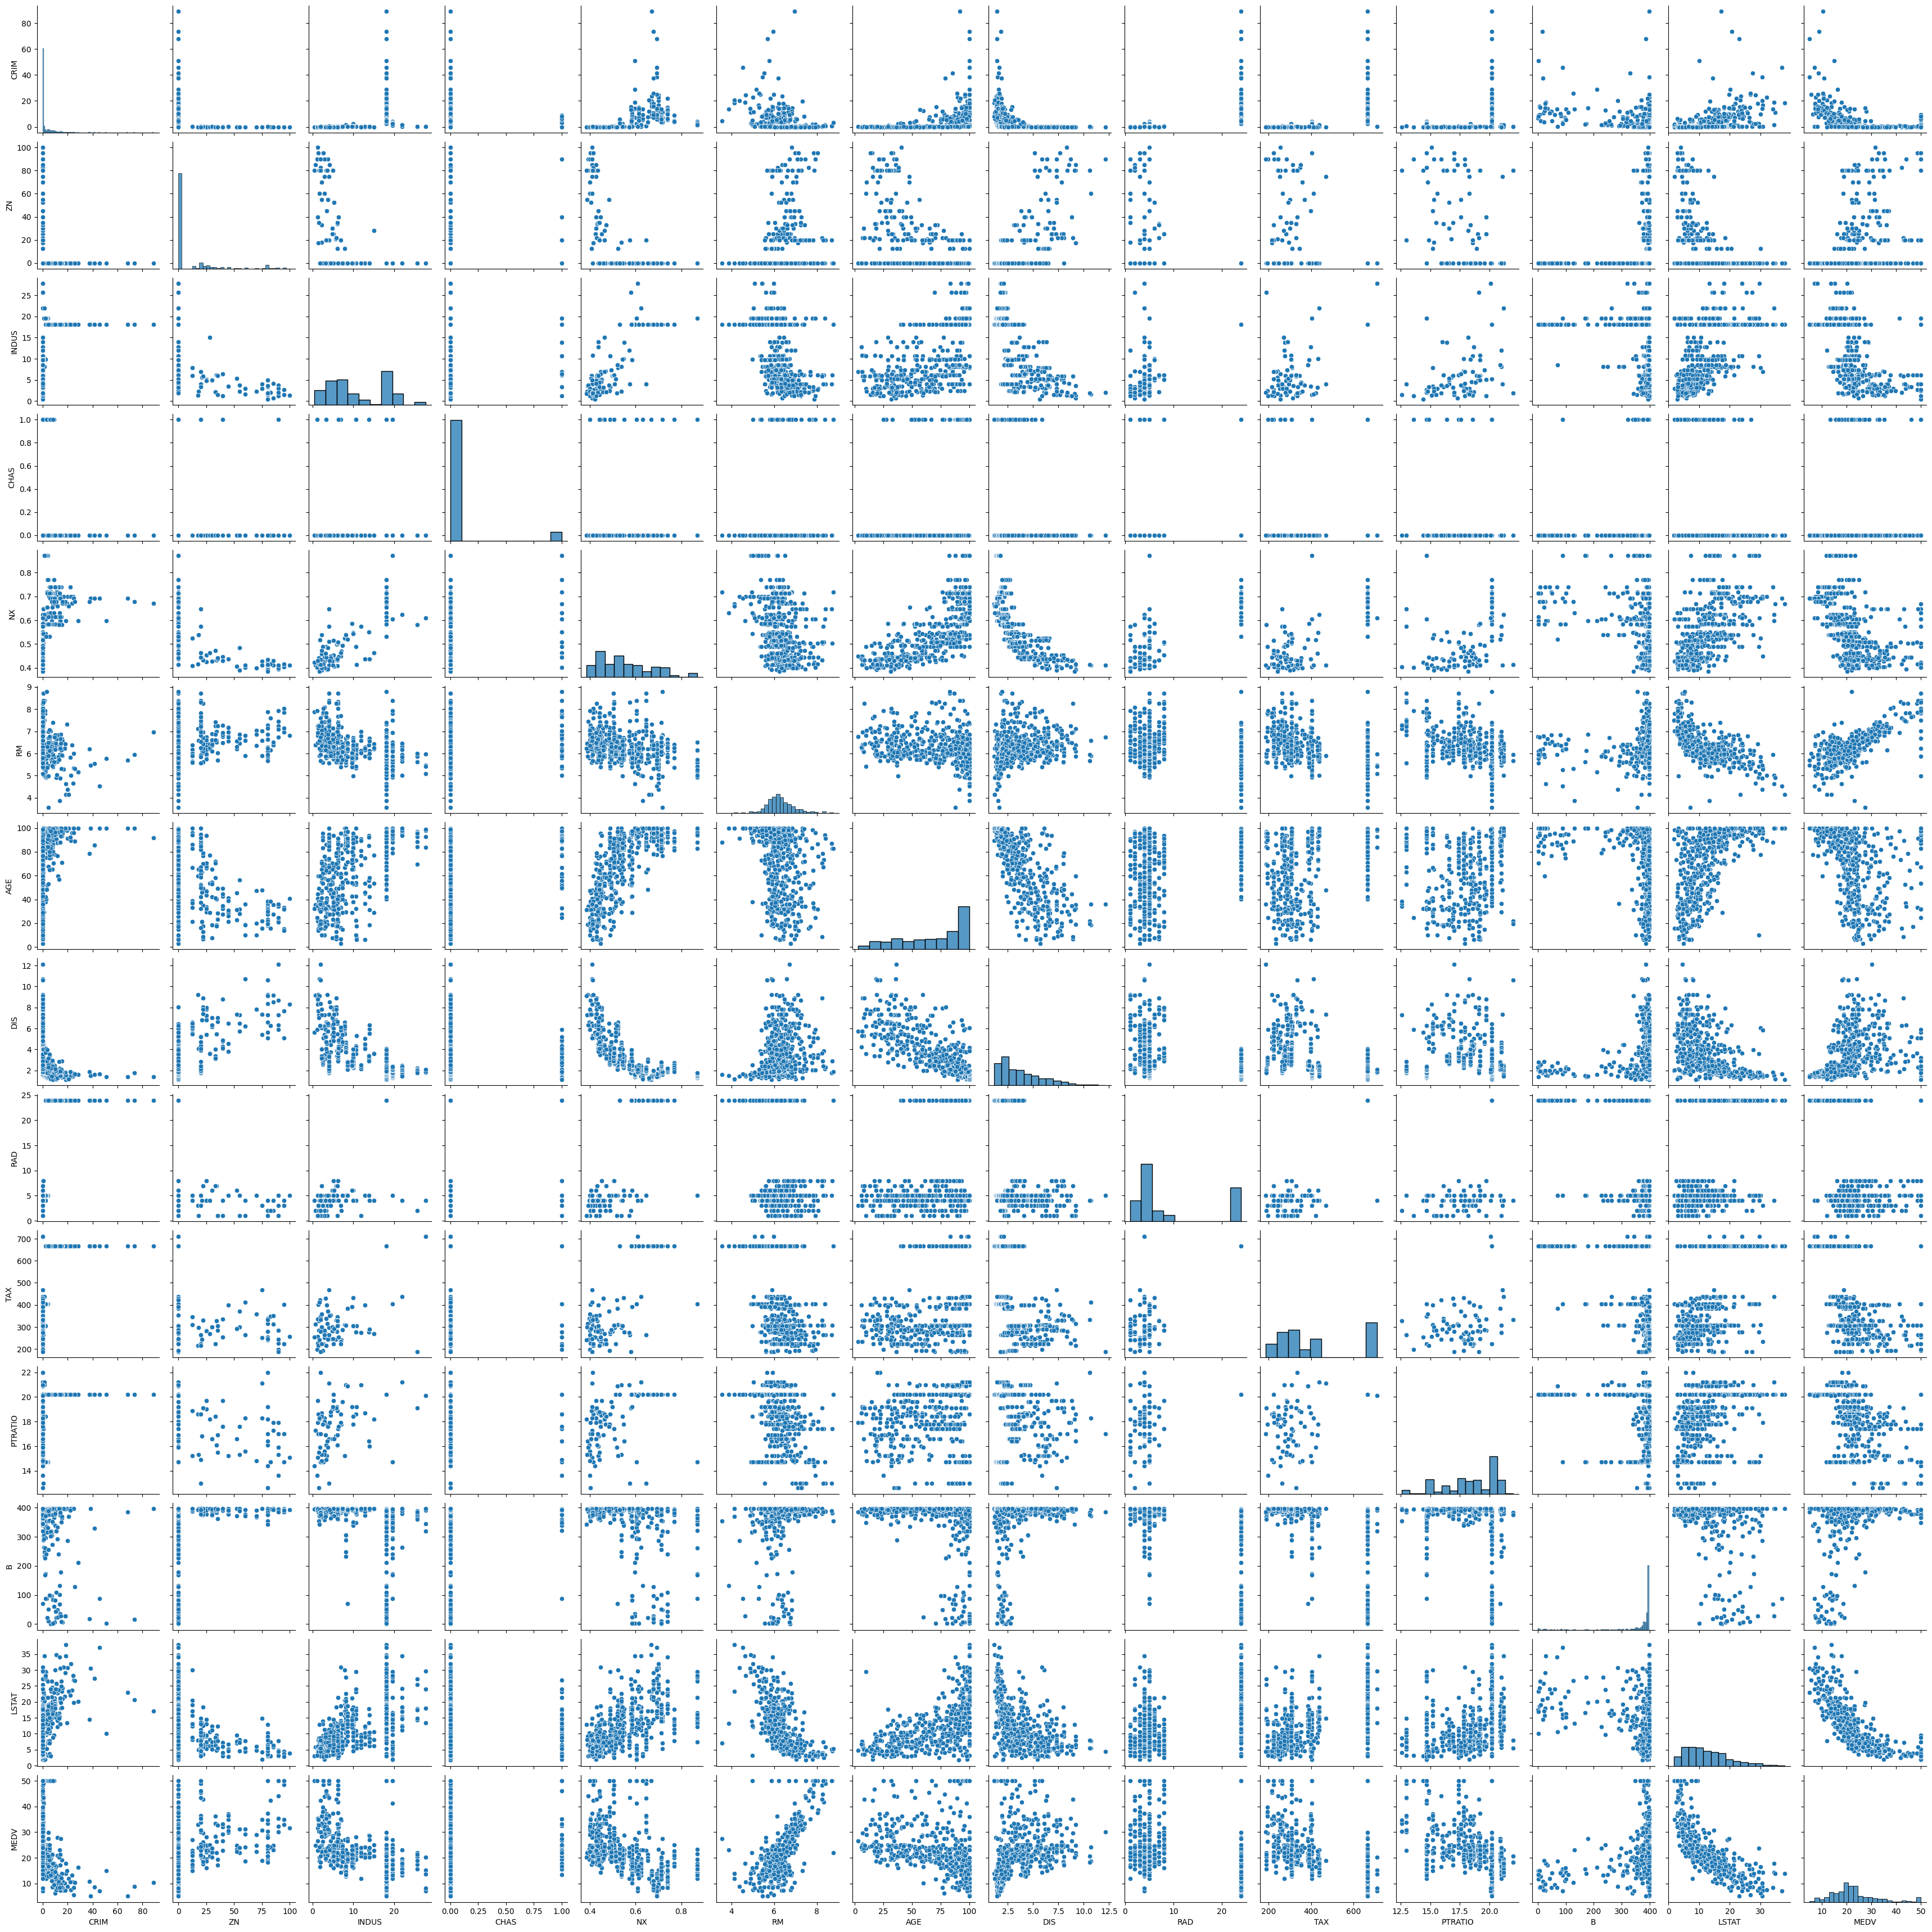

In [5]:
import seaborn as sns
sns.pairplot(boston)
# Scatter plot to see correlation and distribution of IVs

Distribution of y (DV) is normal
Ideally, each IV should be normally distributed (Histograms with themselves given above diagonally above). Then , the predictions that you shall be doing for y (DV) will also be normally distributed.

<Axes: xlabel='MEDV', ylabel='Density'>

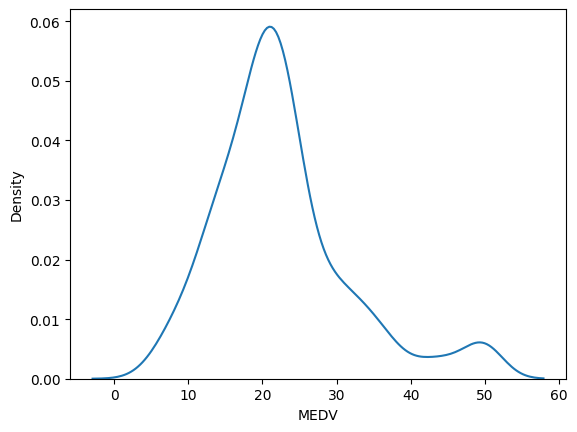

In [6]:
sns.kdeplot(boston["MEDV"])#distribution of DV based on historical data
#rather we shall check the distribution of the predictions instead of historical values of y

Multicollinearity: Independent variables are correlated, and we dont want this.

In [7]:
#split the data between train and test
from sklearn.model_selection import train_test_split

#import linear regression algorithm
from sklearn.linear_model import LinearRegression

#regression involves the logic of slope, scaling is advisable
from sklearn.preprocessing import StandardScaler

In [8]:
#applying the standard scaler and scale the contents to a comparable scale 
# So that no one variable dominates our model

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
#instantiate the standard scaler

#fit the scaler to independent variables

xs = scaler.fit_transform(x)
#x is the array of independent variables

#data gets converted into array

In [9]:
#split the data between train and the test
#splitting is random
x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size=0.3, random_state=1)
#random state: results are reproducible

In [10]:
x_train.shape

(354, 13)

In [11]:
x_test.shape

(152, 13)

In [12]:
model = LinearRegression()#creating an instance
#fit_intercept: True
#normalize= False, deprecated

model.fit(x_train, y_train)#fitting the model of train data
#algo will do all the mathematical work and compute the desired variables
#intercept and the coeffs of each independent variable

LinearRegression()

In [13]:
model.intercept_

np.float64(22.589670302295588)

In [14]:
model.coef_

array([-0.84677953,  1.41623312,  0.40553633,  0.61902108, -2.48543003,
        1.96244469,  0.10052138, -3.18967316,  2.67519835, -1.89922198,
       -2.17462796,  0.58828654, -4.05806653])

In [15]:
o = boston.drop("MEDV", axis=1)
#dataframe of independent variables
o.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [16]:
z = pd.DataFrame(model.coef_, index=o.columns)
z

,0
CRIM,-0.846780
ZN,1.416233
INDUS,0.405536
CHAS,0.619021
NX,-2.485430
RM,1.962445
AGE,0.100521
DIS,-3.189673
RAD,2.675198
TAX,-1.899222


In [17]:
#use the above model for generating MEDV predictions on test data
y_pred = model.predict(x_test)#test independent variables
#prediction means estimating the median value

In [18]:
y_pred

array([32.3914647 , 27.94401279, 17.83762764, 21.66941388, 18.93639614,
       20.01995795, 32.63414961, 17.86179976, 24.73211676, 26.77346826,
       27.26138023, 28.63243014, 21.16103038, 27.15098589, 23.33198614,
       21.02894005, 17.11819755, 37.52455938, 30.69864427,  8.46104486,
       20.83966032, 16.26732451, 25.05030307, 24.8069032 , 31.6789299 ,
       10.98989363, 13.54111562, 16.54697099, 35.86699683, 14.69589266,
       21.05655107, 13.90301353, 43.01321262, 17.80335305, 21.68817023,
       20.45077825, 17.38095983, 26.81334904, 10.08706217, 19.96174586,
       24.1983249 , 21.00202622, 29.38682967, 16.33215467, 19.37439646,
       14.45525235, 39.52670798, 18.18535021, 26.38536303, 20.41420863,
       25.08511581, 24.40208165, 24.87902769, 26.97887956,  4.93921657,
       24.0001365 , 10.66711602, 26.98494775, 16.63507993, 35.31652989,
       19.49249915, 27.37577863, 16.53965715, 19.09746715, 11.06765336,
       32.03445261, 36.15847648, 21.53547868, 24.96434626, 25.50

In [19]:
#error metric computations (RMSE)
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate residuals = actual - predicted
#square the residuals
#sum the squared values/n: MSE

mse = mean_squared_error(y_test, y_pred)#actual y test value, predicted y test value
rmse = sqrt(mse)
rmse #margin of error on the test data

4.453237437198149

In [20]:
#r squared: coeff of determination
model.score(x_test,y_test)

0.7836295385076291

78.36% variation in y (DV) is explained by x (IV)

In [21]:
#use the above model for generating MEDV predictions on train data
y_pred_train = model.predict(x_train)

In [22]:
mse_train = mean_squared_error(y_train, y_pred_train)#actual y test value, predicted y test value
rmse_train = sqrt(mse_train)
rmse_train #margin of error on the train data

4.849055005805464

In [23]:
#r squared: coeff of determination
model.score(x_train,y_train)

0.7103879080674731

Test is more accurate than train, so bias variance tradeoff is present.

Lets check the distribution of the predictions produced by the model, This will help us in confirming the assumption of normally distributed DV.

<Axes: ylabel='Density'>

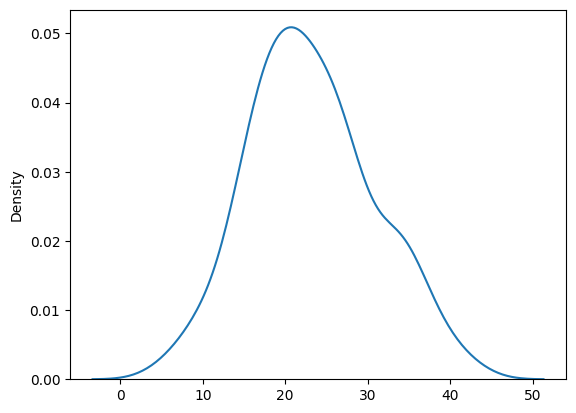

In [24]:
sns.kdeplot(y_pred)
#kernel density plot

In [25]:
# Homoscedasticity : Constant variance
# Hetroscedasticity : Increasing variance

<Axes: ylabel='Density'>

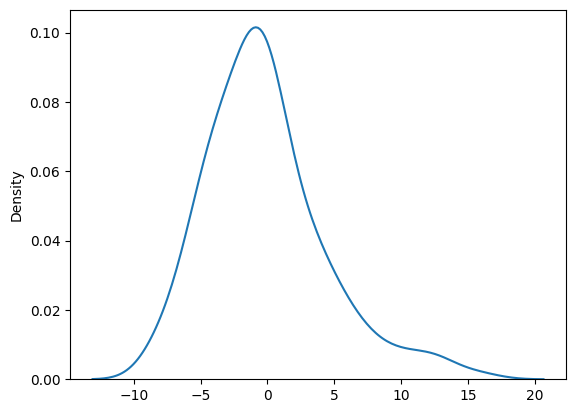

In [26]:
residuals = y_test - y_pred #av- pv
sns.kdeplot(residuals)

Conventional OLS method: statsmodels: how well a given model fits the data and what variables explain or affect the outcome or what is the size of the effect
emphasis lies in the features or the inputs, included hypothesis tests and goodness of fit tests,

ML model: follow the ML tradition where choosing the best model (best line of fit) based on SSR

emphasis is on the model selection based on the test data (out of sample data) and requires cross validation

In [27]:
# Checking multicollinearirty
boston.corr()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


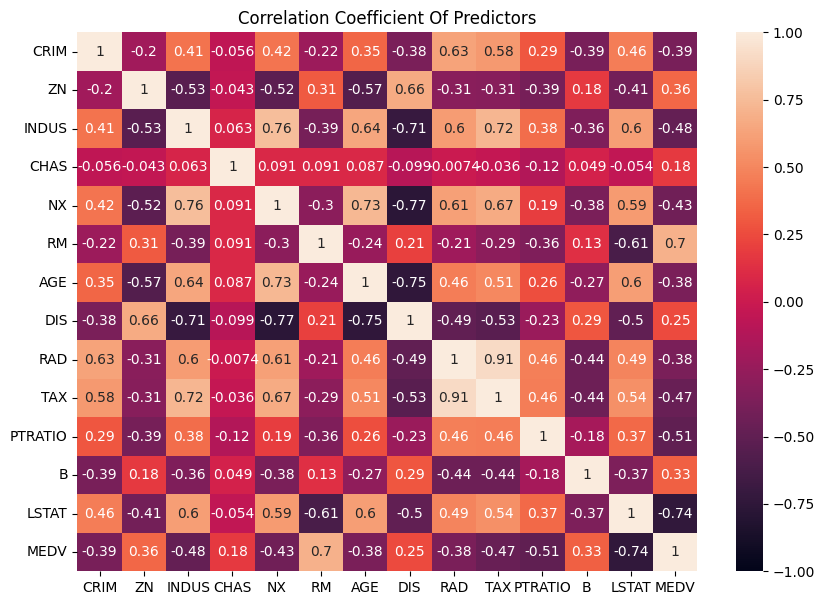

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# set figure size
plt.figure(figsize=(10,7))

sns.heatmap(boston.corr(), annot=True, vmin=-1, vmax=1) # annotations true, showing numbers in figure
plt.title('Correlation Coefficient Of Predictors')
plt.show()

Computing the VIF

This is a chance to calculate the VIF values of all the previously identified features.

The statsmodels package contains a function that allows you to directly compute the VIF values of all features. Since we may need to find calculate the VIF of the features more than once, let’s create a function named ‘compute_vif’ that can perform this task.

In [29]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):

    X = boston[considered_features]
    # the calculation of variance inflation requires a constant, so we add a column
    X['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame() # creating an empty df
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] #[1] is used only for extracting columns of X
    vif = vif[vif['Variable']!='intercept'] # we dont want intecerpt column so here we remove it
    return vif

In [30]:
# can pass on all the features also if not selecting individual wise
# features to consider removing which are darker and lighter in shades in above diagram
considered_features = ['INDUS','ZN','NX','AGE','DIS','LSTAT','RM','TAX']


# compute vif
compute_vif(considered_features).sort_values('VIF', ascending=False)

C:\Users\Aman\AppData\Local\Temp\ipykernel_7632\604517713.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
4,DIS,3.859754
2,NX,3.827652
0,INDUS,3.586229
3,AGE,3.046857
5,LSTAT,2.730311
7,TAX,2.388152
1,ZN,2.003845
6,RM,1.817223


Benchmark value is 5, and if any vif value comes more than 5 we will remove the first one (with the most vif value),
and then again check for other variable, and do this till the values of all are less than 5.

WE SHOULD ONLY ELIMINATE ONE AT A TIME AS WE WANT MAX INFO POSSIBLE.

In [31]:
# compute vif values after removing a feature
considered_features.remove('DIS')
compute_vif(considered_features)

C:\Users\Aman\AppData\Local\Temp\ipykernel_7632\604517713.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
0,INDUS,3.443077
1,ZN,1.687543
2,NX,3.394743
3,AGE,2.791920
4,LSTAT,2.728607
5,RM,1.772209
6,TAX,2.388042


Now that the variance inflation factors are all within the acceptable range, the derived model will be more likely to yield statistically significant results.

In [32]:
import statsmodels.formula.api as smf

reg_all = smf.ols(formula = 'MEDV ~ CRIM + ZN + CHAS + NX + RM + DIS + RAD + TAX + AGE + INDUS+ PTRATIO + B + LSTAT', data=boston).fit()
reg_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 22 Jan 2025   Prob (F-statistic):          6.72e-135
Time:                        13:26:46   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NX           -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

remove variables where p > 0.05

In [33]:
reg_all = smf.ols(formula = 'MEDV ~ CRIM + ZN + CHAS + NX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=boston).fit()
reg_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 22 Jan 2025   Prob (F-statistic):          5.54e-137
Time:                        13:26:46   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NX           -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Coeff is the impact of the variable on model

Insignificant variables impact is more when the difference between R squared and
Adj R squared is more. (Adj will be equal or less than R squared never more)

## Now we create the ML model again after removing the age and indus column

In [34]:
#Creating feature and target arrays
#creating independent variables by x
x = boston.drop(["MEDV","INDUS","AGE"], axis=1).values

#dependent variable: y
y = boston["MEDV"].values

In [35]:
#applying the standard scaler and scale the contents

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
#instantiate the standard scaler

#fit the scaler to independent variables

xs = scaler.fit_transform(x)
#x is the array of independent variables

#data gets converted into array

In [36]:
#split the data between train and the test
#splitting is random # to make it comparable, we take random state same (1) as the splitting will be same
x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size=0.3, random_state=1)
#random state: results are reproducible

In [37]:
model = LinearRegression()#creating an instance
#fit_intercept: True
#normalize= False, deprecated

model.fit(x_train, y_train)#fitting the model of train data
#algo will do all the mathematical work and compute the desired variables
#intercept and the coeffs of each independent variable

LinearRegression()

In [38]:
Y_PRED = model.predict(x_test)

In [39]:
model.score(x_test,y_test)
#78.36%

0.7854584464532348

In [40]:
mse = mean_squared_error(y_test, Y_PRED)
rmse = mse ** 0.5
rmse

4.4343766250006595

In [41]:
#check overfitting
y_pretrain = model.predict(x_train)

In [42]:
model.score(x_train,y_train)

0.709844526155244

Mock input in ordered way, including all factors on which model was trained :

In [43]:
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,15.30,396.90,4.98]
model.predict([row])

array([362.90188152])

But the above model was split dependent, now we have to make the model irrespective of the split, 
it gives us stable value.

### Cross Validation

            1   2   3
Split 1
SPlit 2
Split 3


In [44]:
from sklearn.model_selection import cross_val_score

# Initialize the linear regression model
model = LinearRegression()

# Perform 3-fold cross-validation
cv_scores = cross_val_score(model, xs, y, cv=3, scoring='r2')

# Calculate the average R² score across all folds
average_r2 = np.mean(cv_scores)

print("Cross-validated R² scores:", cv_scores)
print("Average R² score:", average_r2)

Cross-validated R² scores: [ 0.64635826  0.56837525 -5.69104866]
Average R² score: -1.4921050500022777


As we have made the model on train-test data no on whole data, so we do on those data :

In [45]:
from sklearn.model_selection import cross_val_score

# Initialize the linear regression model
model = LinearRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')

# Calculate the average R² score across all folds
average_r2 = np.mean(cv_scores)

print("Cross-validated R² scores:", cv_scores)
print("Average R² score:", average_r2)

Cross-validated R² scores: [0.49847264 0.79968498 0.61325072 0.71893119 0.70168828]
Average R² score: 0.666405564394268


In [46]:
from sklearn.model_selection import cross_val_score

# Initialize the linear regression model
model = LinearRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, x_test, y_test, cv=5, scoring='r2')

# Calculate the average R² score across all folds
average_r2 = np.mean(cv_scores)

print("Cross-validated R² scores:", cv_scores)
print("Average R² score:", average_r2)

Cross-validated R² scores: [0.66784445 0.81906957 0.67958995 0.89932502 0.82439852]
Average R² score: 0.7780455027785684


### This means our model is not split dependent.